## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Profiling

In [2]:
column_names = ["NAME","HG", "N", "ELV", "SA", "Z", "LT", "ST", "DA", "RF", 
           "FR", "DAM", "LAT1", "LAT2", "LAT3", "LONG1", "LONG2", "LONG3"]

data_maine = pd.read_csv("Assignment2_2024_Data.txt", delimiter=" ", names=column_names)

display(data_maine.head())

,NAME,HG,N,ELV,SA,Z,LT,ST,DA,RF,FR,DAM,LAT1,LAT2,LAT3,LONG1,LONG2,LONG3
0,ALLEN.P,1.080,3,425,83,27.0,3.0,1.0,2.0,0.60,2.8,1.0,44,57,44,68,5,7
1,ALLIGATOR.P,0.025,2,1494,47,26.0,2.0,0.0,1.0,0.69,0.8,1.0,45,37,50,69,12,30
2,ANASAGUNTICOOK.L,0.570,5,402,568,54.0,2.0,1.0,15.0,0.56,1.1,0.0,44,25,13,70,19,22
3,BALCH&STUMP.PONDS,0.770,5,557,704,44.0,2.0,1.0,14.0,0.58,2.7,0.0,43,37,0,70,59,4
4,BASKAHEGAN.L,0.790,5,417,6944,22.0,2.0,0.0,123.0,0.57,2.0,1.0,45,30,32,67,50,2


In [3]:
print(f"Shape of the dataset = {data_maine.shape}\n")
display(data_maine.info())
display(data_maine.describe())
display(data_maine.NAME[data_maine['NAME'].duplicated()])

duplicated_names = data_maine[data_maine.duplicated(subset=["NAME"])]["NAME"]
for name in duplicated_names:
    indices = data_maine[data_maine["NAME"] == name].index
    for i, index in enumerate(indices):
        data_maine.at[index, "NAME"] = f"{name}{i + 1}"

data_maine.dropna(subset=['HG','DAM','LT'], inplace=True)
print(f"Shape of the dataset = {data_maine.shape}\n")

Shape of the dataset = (120, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    120 non-null    object 
 1   HG      120 non-null    float64
 2   N       120 non-null    int64  
 3   ELV     120 non-null    int64  
 4   SA      120 non-null    int64  
 5   Z       119 non-null    float64
 6   LT      119 non-null    float64
 7   ST      118 non-null    float64
 8   DA      117 non-null    float64
 9   RF      113 non-null    float64
 10  FR      113 non-null    float64
 11  DAM     118 non-null    float64
 12  LAT1    120 non-null    int64  
 13  LAT2    120 non-null    int64  
 14  LAT3    120 non-null    int64  
 15  LONG1   120 non-null    int64  
 16  LONG2   120 non-null    int64  
 17  LONG3   120 non-null    int64  
dtypes: float64(8), int64(9), object(1)
memory usage: 17.0+ KB


None

,HG,N,ELV,SA,Z,LT,ST,DA,RF,FR,DAM,LAT1,LAT2,LAT3,LONG1,LONG2,LONG3
count,120.000000,120.000000,120.000000,120.000000,119.000000,119.000000,118.000000,117.000000,113.000000,113.000000,118.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.485050,4.258333,567.283333,901.300000,41.201681,2.201681,0.559322,42.247863,0.550708,6.461062,0.601695,44.550000,28.141667,29.241667,68.833333,30.450000,30.583333
std,0.333267,1.088487,430.684196,1985.520644,29.980666,0.719932,0.498586,117.011413,0.099917,11.612443,0.491637,0.924458,16.730838,17.661617,0.964351,17.724242,15.770190
min,0.025000,1.000000,15.000000,12.000000,5.000000,1.000000,0.000000,0.000000,0.060000,0.100000,0.000000,43.000000,0.000000,0.000000,67.000000,0.000000,1.000000
25%,0.250000,4.000000,259.000000,79.750000,21.000000,2.000000,0.000000,2.000000,0.510000,0.900000,0.000000,44.000000,15.000000,13.000000,68.000000,15.750000,18.000000
50%,0.410000,5.000000,416.500000,236.500000,34.000000,2.000000,1.000000,6.000000,0.560000,2.100000,1.000000,44.000000,26.000000,28.000000,69.000000,31.500000,31.000000
75%,0.662500,5.000000,829.500000,632.000000,50.000000,3.000000,1.000000,21.000000,0.610000,5.800000,1.000000,45.000000,43.250000,45.000000,70.000000,46.000000,44.000000
max,2.500000,5.000000,1700.000000,14340.000000,158.000000,3.000000,1.000000,762.000000,0.760000,64.100000,1.000000,47.000000,59.000000,59.000000,71.000000,59.000000,59.000000


65        LONG.P
73       NORTH.P
77       OTTER.P
85    PLEASANT.L
95       ROUND.P
Name: NAME, dtype: object

Shape of the dataset = (118, 18)



## Check for any inconsistencies in number of fish observed

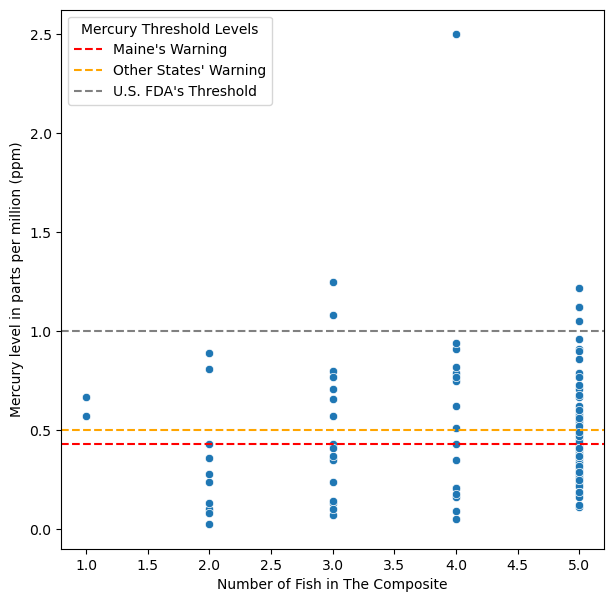

In [4]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data_maine, x='N', y='HG')
plt.xlabel('Number of Fish in The Composite')
plt.ylabel('Mercury level in parts per million (ppm)')
plt.axhline(y=0.43, color='red', linestyle='--', label="Maine's Warning")
plt.axhline(y=0.5, color='orange', linestyle='--', label="Other States' Warning")
plt.axhline(y=1, color='gray', linestyle='--', label="U.S. FDA's Threshold")
plt.legend(title='Mercury Threshold Levels')
plt.show()

### Q1- Is the mercury level high enough to be a concern?

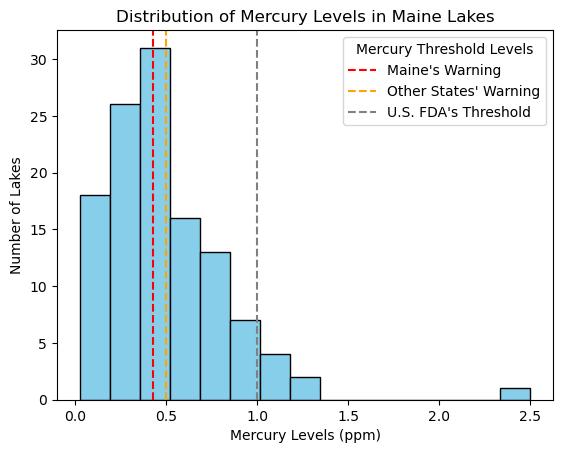

Number of Lakes with Mercury Level > 1ppm = 7
Number of Lakes with Mercury Level > 0.5ppm = 44
Number of Lakes with Mercury Level > 0.43ppm = 53

One-sample t-test for Maine threshold:
t-statistic: 1.7747372378544222
p-value: 0.07854192451234215


In [5]:
# Scatterplot of each lake's mercury levels
#plt.figure(figsize=(8,6))
#sns.scatterplot(x=data_maine["NAME"].index, y=data_maine["HG"])
#plt.xlabel('Lake Number')
#plt.ylabel('Mercury level in parts per million (ppm)')
#plt.axhline(y=0.43, color='red', linestyle='--', label="Maine's Warning")
#plt.axhline(y=0.5, color='orange', linestyle='--', label="Other States' Warning")
#plt.axhline(y=1, color='gray', linestyle='--', label="U.S. FDA's Threshold")
#plt.legend(title='Mercury Threshold Levels')
#plt.show()

# Histogram of Mercury Levels
plt.hist(data_maine.HG, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Mercury Levels (ppm)')
plt.ylabel('Number of Lakes')
plt.axvline(x=0.43, color='red', linestyle='--', label="Maine's Warning")
plt.axvline(x=0.5, color='orange', linestyle='--', label="Other States' Warning")
plt.axvline(x=1, color='gray', linestyle='--', label="U.S. FDA's Threshold")
plt.legend(title='Mercury Threshold Levels')
plt.title('Distribution of Mercury Levels in Maine Lakes')
plt.show()

print(f"Number of Lakes with Mercury Level > 1ppm = {data_maine.HG[(data_maine['HG']>1)].count()}")
print(f"Number of Lakes with Mercury Level > 0.5ppm = {data_maine.HG[(data_maine['HG']>0.5)].count()}")
print(f"Number of Lakes with Mercury Level > 0.43ppm = {data_maine.HG[(data_maine['HG']>0.43)].count()}")

# t-test
from scipy.stats import ttest_1samp
threshold_maine = 0.43
# Perform one-sample t-test
t_stat, p_value = ttest_1samp(data_maine["HG"], threshold_maine)
# Print the results
print("\nOne-sample t-test for Maine threshold:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

### Q2 - Does the prescence of human infrastructure affect mercury levels?

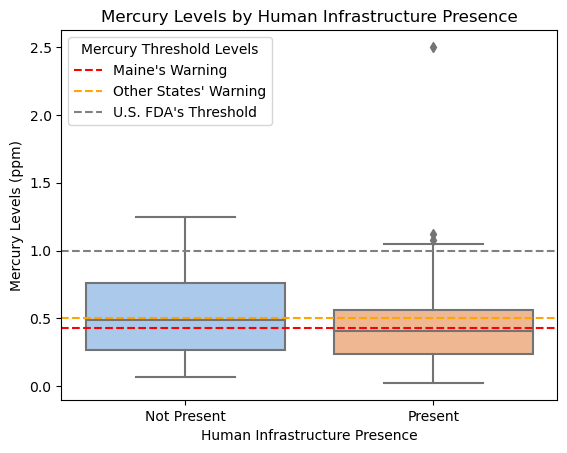

Number of Lakes without Human Infrastructure Present & Mercury Level > 1ppm = 3
Number of Lakes without Human Infrastructure Present & Mercury Level > 0.5ppm = 23
Number of Lakes without Human Infrastructure Present & Mercury Level > 0.43ppm = 25

Number of Lakes with Human Infrastructure Present & Mercury Level > 1ppm = 4
Number of Lakes with Human Infrastructure Present & Mercury Level > 0.5ppm = 21
Number of Lakes with Human Infrastructure Present & Mercury Level > 0.43ppm = 28

Two-sample t-test for mercury levels with and without dams:
t-statistic: 1.1387126928855067
p-value: 0.25716920851147246


In [6]:
# Box Plot of Mercury Levels by Infrastructure Presence
#plt.figure(figsize=(8,6))
sns.boxplot(data=data_maine, x='DAM', y="HG", palette='pastel')
plt.xlabel('Human Infrastructure Presence')
plt.ylabel('Mercury Levels (ppm)')
plt.axhline(y=0.43, color='red', linestyle='--', label="Maine's Warning")
plt.axhline(y=0.5, color='orange', linestyle='--', label="Other States' Warning")
plt.axhline(y=1, color='gray', linestyle='--', label="U.S. FDA's Threshold")
plt.xticks(ticks=[0, 1], labels=['Not Present', 'Present'])
plt.legend(title='Mercury Threshold Levels')
plt.title('Mercury Levels by Human Infrastructure Presence')
plt.show()

print(f"Number of Lakes without Human Infrastructure Present & Mercury Level > 1ppm = {data_maine.HG[(data_maine['HG']>1) & (data_maine['DAM']==0)].count()}")
print(f"Number of Lakes without Human Infrastructure Present & Mercury Level > 0.5ppm = {data_maine.HG[(data_maine['HG']>0.5) & (data_maine['DAM']==0)].count()}")
print(f"Number of Lakes without Human Infrastructure Present & Mercury Level > 0.43ppm = {data_maine.HG[(data_maine['HG']>0.43) & (data_maine['DAM']==0)].count()}\n")

print(f"Number of Lakes with Human Infrastructure Present & Mercury Level > 1ppm = {data_maine.HG[(data_maine['HG']>1) & (data_maine['DAM']==1)].count()}")
print(f"Number of Lakes with Human Infrastructure Present & Mercury Level > 0.5ppm = {data_maine.HG[(data_maine['HG']>0.5) & (data_maine['DAM']==1)].count()}")
print(f"Number of Lakes with Human Infrastructure Present & Mercury Level > 0.43ppm = {data_maine.HG[(data_maine['HG']>0.43) & (data_maine['DAM']==1)].count()}")

# t-test
from scipy.stats import ttest_ind
# Perform two-sample t-test
t_stat, p_value = ttest_ind(data_maine.HG[data_maine['DAM']==0], data_maine.HG[data_maine['DAM']==1])
# Print the results
print("\nTwo-sample t-test for mercury levels with and without dams:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

### Q3 - Does the mercury level vary by lake type?

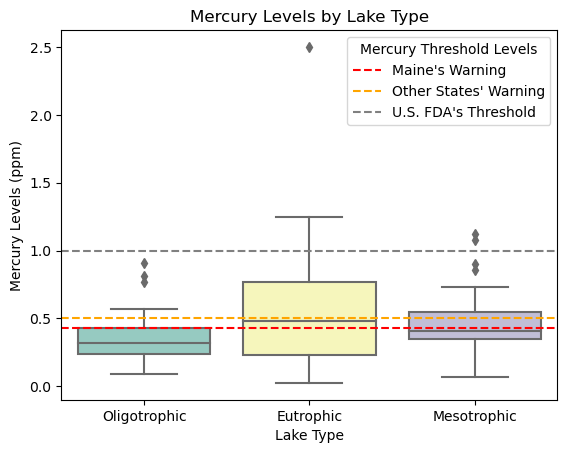

Number of Oligotrophic Lakes with Mercury Level > 1ppm = 0
Number of Oligotrophic Lakes with Mercury Level > 0.5ppm = 4
Number of Oligotrophic Lakes with Mercury Level > 0.43ppm = 5

Number of Eutrophic Lakes with Mercury Level > 1ppm = 5
Number of Eutrophic Lakes with Mercury Level > 0.5ppm = 26
Number of Eutrophic Lakes with Mercury Level > 0.43ppm = 28

Number of Mesotrophic Lakes with Mercury Level > 1ppm = 2
Number of Mesotrophic Lakes with Mercury Level > 0.5ppm = 14
Number of Mesotrophic Lakes with Mercury Level > 0.43ppm = 20

Chi-square test for association between lake type and mercury levels above threshold:
Chi-square statistic: 4.552105107818884
p-value: 0.10268876607025279

ANOVA for variation of mercury levels by lake type:
F-statistic: 2.1954255940940737
p-value: 0.11595528102716827


In [7]:
# Box Plot of Mercury Levels by Lake Type
#plt.figure(figsize=(8,6))
sns.boxplot(data=data_maine, x='LT', y="HG", palette='Set3')
plt.xlabel('Lake Type')
plt.ylabel('Mercury Levels (ppm)')
plt.axhline(y=0.43, color='red', linestyle='--', label="Maine's Warning")
plt.axhline(y=0.5, color='orange', linestyle='--', label="Other States' Warning")
plt.axhline(y=1, color='gray', linestyle='--', label="U.S. FDA's Threshold")
plt.xticks(ticks=[0, 1, 2], labels=['Oligotrophic', 'Eutrophic', 'Mesotrophic'])
plt.legend(title='Mercury Threshold Levels')
plt.title('Mercury Levels by Lake Type')
plt.show()

print(f"Number of Oligotrophic Lakes with Mercury Level > 1ppm = {data_maine.HG[(data_maine['HG']>1) & (data_maine['LT']==1)].count()}")
print(f"Number of Oligotrophic Lakes with Mercury Level > 0.5ppm = {data_maine.HG[(data_maine['HG']>0.5) & (data_maine['LT']==1)].count()}")
print(f"Number of Oligotrophic Lakes with Mercury Level > 0.43ppm = {data_maine.HG[(data_maine['HG']>0.43) & (data_maine['LT']==1)].count()}\n")

print(f"Number of Eutrophic Lakes with Mercury Level > 1ppm = {data_maine.HG[(data_maine['HG']>1) & (data_maine['LT']==2)].count()}")
print(f"Number of Eutrophic Lakes with Mercury Level > 0.5ppm = {data_maine.HG[(data_maine['HG']>0.5) & (data_maine['LT']==2)].count()}")
print(f"Number of Eutrophic Lakes with Mercury Level > 0.43ppm = {data_maine.HG[(data_maine['HG']>0.43) & (data_maine['LT']==2)].count()}\n")

print(f"Number of Mesotrophic Lakes with Mercury Level > 1ppm = {data_maine.HG[(data_maine['HG']>1) & (data_maine['LT']==3)].count()}")
print(f"Number of Mesotrophic Lakes with Mercury Level > 0.5ppm = {data_maine.HG[(data_maine['HG']>0.5) & (data_maine['LT']==3)].count()}")
print(f"Number of Mesotrophic Lakes with Mercury Level > 0.43ppm = {data_maine.HG[(data_maine['HG']>0.43) & (data_maine['LT']==3)].count()}")

# Chi-square test
from scipy.stats import f_oneway, chi2_contingency
# Create a contingency table for chi-square test
contingency_table = pd.crosstab(data_maine['LT'], data_maine['HG'] > 0.43)  # Assuming 0.43 is the threshold
# Perform Chi-square test
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print("\nChi-square test for association between lake type and mercury levels above threshold:")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value_chi2)

# ANOVA test
# drop na from dataset
#data_maine.dropna(inplace=True)
# Split mercury levels by lake type
mercury_by_type = [data_maine[data_maine['LT'] == lake_type]['HG'] for lake_type in data_maine['LT'].unique()]
# Perform ANOVA
f_stat, p_value_anova = f_oneway(*mercury_by_type)
print("\nANOVA for variation of mercury levels by lake type:")
print("F-statistic:", f_stat)
print("p-value:", p_value_anova)